In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import numpy as np
import pandas as pd
from ppi_py.datasets import load_dataset
from ppi_py import ppi_logistic_ci, classical_logistic_ci
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from utils import *

# Import the census income data set

In [2]:
dataset_folder = "./data/"
data = load_dataset(dataset_folder, "census_healthcare")
Y_total = data["Y"]
Yhat_total = data["Yhat"]
X_total = data["X"]

# Problem setup

In [3]:
alpha = 0.05
coordinate = 0 # Choose between 0, 1
n_total = Y_total.shape[0]  # Total number of labeled examples
ns = np.linspace(100, 2000, 3).astype(
    int
)  # Test for different numbers of labeled ballots
num_trials = 10
# Compute ground truth
true_theta = LogisticRegression(
    penalty="none",
    solver="lbfgs",
    max_iter=10000,
    tol=1e-15,
    fit_intercept=False,
).fit(X_total, Y_total).coef_.squeeze()[coordinate]

# Construct intervals

In [4]:
# Run prediction-powered inference and classical inference for many values of n
results = []
for i in range(ns.shape[0]):
    for j in tqdm(range(num_trials)):
        # Prediction-Powered Inference
        n = ns[i]
        rand_idx = np.random.permutation(n_total)
        _X, _X_unlabeled = X_total[rand_idx[:n]], X_total[rand_idx[n:]]
        _Y, _Y_unlabeled = Y_total[rand_idx[:n]], Y_total[rand_idx[n:]]
        _Yhat, _Yhat_unlabeled = Yhat_total[rand_idx[:n]], Yhat_total[rand_idx[n:]]
        
        ppi_ci = ppi_logistic_ci(_X, _Y, _Yhat, _X_unlabeled, _Yhat_unlabeled, alpha=alpha, grid_relative=True, grid_radius=5, step_size=1e-10, grad_tol=1e-1)
        
        # Classical interval
        classical_ci = classical_logistic_ci(_X, _Y, alpha=alpha)

        # Append results
        results += [
            pd.DataFrame(
                [
                    {
                        "method": "PPI",
                        "n": n,
                        "lower": ppi_ci[0][coordinate],
                        "upper": ppi_ci[1][coordinate],
                        "trial": j,
                    }
                ]
            )
        ]
        results += [
            pd.DataFrame(
                [
                    {
                        "method": "Classical",
                        "n": n,
                        "lower": classical_ci[0][coordinate],
                        "upper": classical_ci[1][coordinate],
                        "trial": j,
                    }
                ]
            )
        ]

# Imputed CI
imputed_ci = classical_logistic_ci(X_total, (Yhat_total > 0.5).astype(int), alpha=alpha)
results += [
    pd.DataFrame(
        [
            {
                "method": "Imputation",
                "n": np.nan,
                "lower": imputed_ci[0][coordinate],
                "upper": imputed_ci[1][coordinate],
                "trial": 0,
            }
        ]
    )
]

df = pd.concat(results, axis=0, ignore_index=True)
df["width"] = df["upper"] - df["lower"]

  0%|                                                    | 0/10 [00:00<?, ?it/s]

0


 10%|████▍                                       | 1/10 [00:05<00:52,  5.79s/it]

0


 20%|████████▊                                   | 2/10 [00:09<00:35,  4.38s/it]

0


 30%|█████████████▏                              | 3/10 [00:13<00:30,  4.38s/it]

0


 40%|█████████████████▌                          | 4/10 [00:21<00:34,  5.82s/it]

0


 50%|██████████████████████                      | 5/10 [00:28<00:30,  6.19s/it]

0


 60%|██████████████████████████▍                 | 6/10 [00:33<00:22,  5.68s/it]

0


 70%|██████████████████████████████▊             | 7/10 [00:40<00:18,  6.12s/it]

0


 80%|███████████████████████████████████▏        | 8/10 [00:44<00:11,  5.56s/it]

0


 90%|███████████████████████████████████████▌    | 9/10 [00:49<00:05,  5.26s/it]

0


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0


 10%|████▍                                       | 1/10 [00:04<00:40,  4.48s/it]

0


 20%|████████▊                                   | 2/10 [00:09<00:38,  4.76s/it]

0


 30%|█████████████▏                              | 3/10 [00:14<00:34,  4.94s/it]

0


 40%|█████████████████▌                          | 4/10 [00:21<00:33,  5.53s/it]

0


 50%|██████████████████████                      | 5/10 [00:26<00:27,  5.48s/it]

0


 60%|██████████████████████████▍                 | 6/10 [00:32<00:22,  5.75s/it]

0


 70%|██████████████████████████████▊             | 7/10 [00:37<00:16,  5.52s/it]

0


 80%|███████████████████████████████████▏        | 8/10 [00:43<00:11,  5.71s/it]

0


 90%|███████████████████████████████████████▌    | 9/10 [00:50<00:06,  6.14s/it]

0


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0


 10%|████▍                                       | 1/10 [00:05<00:49,  5.55s/it]

0


 20%|████████▊                                   | 2/10 [00:10<00:43,  5.41s/it]

0


 30%|█████████████▏                              | 3/10 [00:15<00:35,  5.13s/it]

0


 40%|█████████████████▌                          | 4/10 [00:20<00:29,  4.98s/it]

0


 50%|██████████████████████                      | 5/10 [00:26<00:27,  5.52s/it]

0


 60%|██████████████████████████▍                 | 6/10 [00:32<00:22,  5.70s/it]

0


 70%|██████████████████████████████▊             | 7/10 [00:38<00:16,  5.59s/it]

0


 80%|███████████████████████████████████▏        | 8/10 [00:44<00:11,  5.80s/it]

0


 90%|███████████████████████████████████████▌    | 9/10 [00:50<00:05,  5.76s/it]

0


100%|███████████████████████████████████████████| 10/10 [00:53<00:00,  5.37s/it]


# Plot results

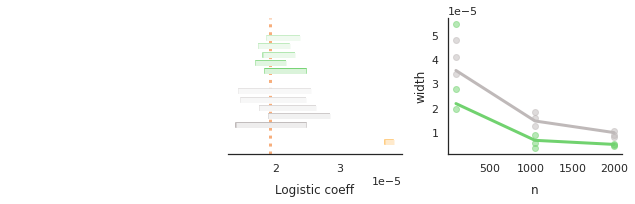

In [28]:
make_plots(
    df,
    "./plots/census_healthcare.pdf",
    intervals_xlabel="Logistic coeff",
    n_idx=-1,
    true_theta=true_theta,
)